In [1]:
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="-1"    
import tensorflow as tf
import cv2
from keras.models import load_model
import numpy as np
import random
from keras.layers import Flatten,Dense,Input,concatenate,Conv2D
from keras.models import Model
from keras.activations import sigmoid
from sklearn.model_selection import train_test_split
import random

In [2]:
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0],True)

In [3]:
physical_device = tf.config.list_physical_devices("GPU")
# tf.config.gpu.set_per_process_memory_fraction(0.5)
try:
    tf.config.experimental.set_memory_growth(
        physical_device[0], True
    )
except Exception as e:
    print(e)
    


In [4]:
def brightness(img, brightness_range):
    brightness = random.randint(brightness_range[0],brightness_range[1])/100

    img = img.astype(int)

    #a = np.array([brightness]).astype(int)
    #img += np.reshape(a, (1,1,3))
    img = np.clip(img, 0, 255)
    img = img.astype(np.uint8)
    return img

In [5]:
img_path = r'/home/uas-dtu/FACE RECONITION/lfw_cut-20210117T204134Z-001/lfw_cut'

x = []
y = []
count = 0
index = 0
for folder in os.listdir(img_path):
    count = count + 1
    print("Loading",folder,"...",count)
    im_path = img_path +'/'+ folder
    for imgs in os.listdir(im_path):
        if imgs[-3:] == "jpg":
            
            image = cv2.imread(im_path + '/' + imgs)
            #cv2.imshow("frame",image)
            image = cv2.resize(image,(150,200), interpolation = cv2.INTER_AREA)
            #image = brightness(image,(100,300))
            #cv2.imshow("frame1",image)
            #cv2.waitKey(0)
            index = index + 1
            y.append(folder)
            x.append(image)
    print(index)
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

Loading Patrice_Chereau ... 1
2
Loading Branko_Crvenkovski ... 2
5
Loading Jake_Gyllenhaal ... 3
10
Loading Jeanne_Moreau ... 4
12
Loading Kurt_Warner ... 5
17
Loading Job_Cohen ... 6
19
Loading Woody_Allen ... 7
24
Loading Renee_Zellweger ... 8
41
Loading Win_Aung ... 9
45
Loading Elizabeth_Hurley ... 10
50
Loading Steve_Mariucci ... 11
53
Loading Alex_Barros ... 12
55
Loading Paul_Shanley ... 13
58
Loading Goran_Persson ... 14
60
Loading John_McCallum ... 15
62
Loading John_Mayer ... 16
65
Loading Barbara_Walters ... 17
69
Loading Jean_Brumley ... 18
71
Loading Zinedine_Zidane ... 19
77
Loading Cristina_Fernandez ... 20
79
Loading Arturo_Gatti ... 21
82
Loading Richard_Shelby ... 22
84
Loading Michael_Powell ... 23
89
Loading Chris_Cooper ... 24
91
Loading David_Trimble ... 25
96
Loading S_Jayakumar ... 26
98
Loading Alan_Mulally ... 27
100
Loading Manfred_Stolpe ... 28
102
Loading Alexandra_Stevenson ... 29
105
Loading Hee-Won_Han ... 30
108
Loading Andy_Hebb ... 31
110
Loading Mich

1155
Loading David_Anderson ... 255
1160
Loading Steven_Hatfill ... 256
1162
Loading Silvio_Fernandez ... 257
1164
Loading Adrian_McPherson ... 258
1166
Loading Jerry_Springer ... 259
1170
Loading Tubby_Smith ... 260
1173
Loading Laila_Ali ... 261
1176
Loading Lea_Fastow ... 262
1178
Loading Alexandra_Vodjanikova ... 263
1180
Loading Dick_Latessa ... 264
1182
Loading LK_Advani ... 265
1185
Loading Eric_Hinske ... 266
1187
Loading Boris_Berezovsky ... 267
1189
Loading Jim_Carrey ... 268
1192
Loading Sachiko_Yamada ... 269
1196
Loading Ricky_Martin ... 270
1198
Loading Nicholas_Byron ... 271
1200
Loading Arnold_Palmer ... 272
1203
Loading Tyra_Banks ... 273
1205
Loading Placido_Domingo ... 274
1208
Loading Augusto_Pinochet ... 275
1210
Loading Akbar_Hashemi_Rafsanjani ... 276
1213
Loading Tom_Ridge ... 277
1246
Loading Nikki_Reed ... 278
1248
Loading Gerry_Parsky ... 279
1250
Loading Inam-ul-Haq ... 280
1252
Loading Liza_Minnelli ... 281
1259
Loading Lucy_Liu ... 282
1264
Loading Marie-R

2318
Loading Max_Mayfield ... 493
2320
Loading Rich_Gannon ... 494
2322
Loading Masahiko_Nagasawa ... 495
2324
Loading Roberto_Carlos ... 496
2328
Loading Doug_Collins ... 497
2330
Loading Giuseppe_Gibilisco ... 498
2334
Loading Lee_Hoi-chang ... 499
2338
Loading Rebekah_Chantay_Revels ... 500
2342
Loading Richard_Sambrook ... 501
2344
Loading Bill_McBride ... 502
2354
Loading Takashi_Sorimachi ... 503
2356
Loading Demi_Moore ... 504
2360
Loading Magui_Serna ... 505
2362
Loading Ken_Macha ... 506
2364
Loading Aung_San_Suu_Kyi ... 507
2366
Loading Claire_Danes ... 508
2369
Loading Jackie_Chan ... 509
2382
Loading Diana_Munz ... 510
2385
Loading Tom_Daschle ... 511
2410
Loading Mariangel_Ruiz_Torrealba ... 512
2413
Loading Jose_Viegas_Filho ... 513
2415
Loading Ali_Naimi ... 514
2423
Loading Harry_Belafonte ... 515
2425
Loading Billy_Graham ... 516
2427
Loading Jong_Wook_Lee ... 517
2431
Loading Rafael_Ramirez ... 518
2435
Loading Blythe_Hartley ... 519
2437
Loading Christian_Wulff ... 5

4016
Loading Demetrius_Ferraciu ... 845
4018
Loading Mel_Brooks ... 846
4020
Loading Larry_Thompson ... 847
4024
Loading Duane_Lee_Chapman ... 848
4026
Loading Gary_Winnick ... 849
4028
Loading Rolandas_Paksas ... 850
4030
Loading Mario_Cipollini ... 851
4032
Loading John_Timoney ... 852
4034
Loading Jesse_Ventura ... 853
4037
Loading Paul_Gascoigne ... 854
4040
Loading Patricia_Heaton ... 855
4042
Loading Kurt_Busch ... 856
4044
Loading Scott_McNealy ... 857
4046
Loading Hillary_Clinton ... 858
4060
Loading David_Wolf ... 859
4062
Loading Dai_Bachtiar ... 860
4064
Loading Leonard_Hamilton ... 861
4066
Loading Charles_Schumer ... 862
4068
Loading Prince_Charles ... 863
4073
Loading Sean_Astin ... 864
4076
Loading Bulent_Ecevit ... 865
4082
Loading Roger_Clemens ... 866
4084
Loading Elisabeth_Schumacher ... 867
4086
Loading Tom_Cruise ... 868
4096
Loading Yuri_Fedotov ... 869
4098
Loading Steve_Ballmer ... 870
4100
Loading Herb_Sendek ... 871
4104
Loading Priscilla_Presley ... 872
4106


5828
Loading Xanana_Gusmao ... 1123
5833
Loading JK_Rowling ... 1124
5839
Loading Bertrand_Bonello ... 1125
5841
Loading Warren_Buffett ... 1126
5844
Loading Martin_Hoellwarth ... 1127
5846
Loading Bobby_Goldwater ... 1128
5848
Loading Harbhajan_Singh ... 1129
5850
Loading Oprah_Winfrey ... 1130
5854
Loading Nicole_Kidman ... 1131
5873
Loading Jean-Claude_Braquet ... 1132
5875
Loading Elton_John ... 1133
5882
Loading Prince_Naruhito ... 1134
5885
Loading Vanessa_Williams ... 1135
5888
Loading Cesar_Maia ... 1136
5890
Loading Meryl_Streep ... 1137
5905
Loading Petro_Symonenko ... 1138
5907
Loading Jong_Thae_Hwa ... 1139
5909
Loading Jean-Pierre_Raffarin ... 1140
5916
Loading Richard_Armitage ... 1141
5925
Loading Rainer_Schuettler ... 1142
5930
Loading Dino_de_Laurentis ... 1143
5932
Loading Anthony_Fauci ... 1144
5934
Loading Guillermo_Coria ... 1145
5964
Loading Cesar_Gaviria ... 1146
5972
Loading Bob_Dole ... 1147
5975
Loading Rodrigo_Borja ... 1148
5977
Loading Parris_Glendening ...

7791
Loading Michelle_Kwan ... 1402
7799
Loading Gro_Harlem_Brundtland ... 1403
7801
Loading Kimi_Raikkonen ... 1404
7804
Loading Judy_Genshaft ... 1405
7806
Loading Lord_Hutton ... 1406
7808
Loading Tony_Curtis ... 1407
7810
Loading GL_Peiris ... 1408
7814
Loading James_Butts ... 1409
7816
Loading Britney_Spears ... 1410
7830
Loading Juergen_Peters ... 1411
7832
Loading Grady_Irvin_Jr ... 1412
7834
Loading Courtney_Love ... 1413
7836
Loading Albert_Costa ... 1414
7842
Loading Isabella_Rossellini ... 1415
7845
Loading Maggie_Smith ... 1416
7847
Loading Garry_Kasparov ... 1417
7849
Loading Anibal_Ibarra ... 1418
7852
Loading Wen_Jiabao ... 1419
7865
Loading Edward_Norton ... 1420
7867
Loading Arantxa_Sanchez-Vicario ... 1421
7869
Loading James_Smith ... 1422
7871
Loading Wang_Yingfan ... 1423
7874
Loading Jose_Manuel_Durao_Barroso ... 1424
7879
Loading Martin_McGuinness ... 1425
7884
Loading Sadie_Frost ... 1426
7887
Loading Paul_Burrell ... 1427
7898
Loading Costas_Simitis ... 1428
790

8955
Loading Aleksander_Kwasniewski ... 1634
8959
Loading Terry_McAuliffe ... 1635
8962
Loading Robert_Blackwill ... 1636
8964
Loading Mike_Price ... 1637
8966
Loading Tom_Brady ... 1638
8968
Loading Dennis_Erickson ... 1639
8970
Loading Princess_Elisabeth ... 1640
8972
Loading David_Spade ... 1641
8974
Loading Ahmet_Necdet_Sezer ... 1642
8976
Loading Fred_Eckhard ... 1643
8979
Loading Kim_Jin-sun ... 1644
8981
Loading Sebastian_Saja ... 1645
8984
Loading Lloyd_Ward ... 1646
8986
Loading Chang_Dae-whan ... 1647
8988
Loading Zafarullah_Khan_Jamali ... 1648
8990
Loading Eunice_Barber ... 1649
8992
Loading John_Ashcroft ... 1650
9045
Loading Sally_Kirkland ... 1651
9049
Loading Jim_Furyk ... 1652
9055
Loading Patrick_Leahy ... 1653
9057
Loading Charlie_Zaa ... 1654
9059
Loading Adolfo_Rodriguez_Saa ... 1655
9061
Loading Jean-Francois_Pontal ... 1656
9064
Loading Robert_Bonner ... 1657
9067
Loading Fernando_Henrique_Cardoso ... 1658
9075
Loading Iva_Majoli ... 1659
9077
Loading Yevgeny_Kaf

In [6]:
end = 7925
x_train = x[:end]
y_train = y[:end]
x_test = x[end:]
y_test = y[end:]
print(x_train.shape)
print(y_train.shape)

(7925, 200, 150, 3)
(7925,)


In [7]:
def create_batch(batch_size,m):
    x_anchors = np.zeros((batch_size,200,150,3))
    x_positives = np.zeros((batch_size,200,150,3))
    x_negatives = np.zeros((batch_size,200,150,3))
    
    if m == 1:
        T = x_train
        S = y_train
    else:
        T = x_test
        S = y_test
        
    for i in range(0, batch_size):

        random_index = random.randint(0, T.shape[0] - 1)
        x_anchor = T[random_index]
        #cv2.imshow(x_anchor)
        y = S[random_index]
        #cv2.imshow(x_anchor)
        #print(y)
        #print(np.where(y_train == y),np.where(y_train != y))

        indices_for_pos = np.squeeze(np.where(S == y))
        indices_for_neg = np.squeeze(np.where(S != y))
        #print(indices_for_pos,indices_for_neg)
        #print("\n")
        x_positive = T[indices_for_pos[random.randint(0, len(indices_for_pos) - 1)]]
        x_negative = T[indices_for_neg[random.randint(0, len(indices_for_neg) - 1)]]

        x_anchors[i] = x_anchor
        x_positives[i] = x_positive
        x_negatives[i] = x_negative

    return [x_anchors, x_positives, x_negatives]


In [8]:
emb_size = 64

m = tf.keras.applications.DenseNet121(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(200,150,3),
    pooling=None,
    classes=10,
)

m.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 150, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 206, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 100, 75, 64)  9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 100, 75, 64)  256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [9]:
flatten = m.output
flatten = Flatten()(flatten)
embmodel = Dense(64, activation="relu")(flatten)
embmodel = Dense(emb_size, activation='sigmoid')(embmodel)

embmodel = Model(inputs=m.input, outputs=embmodel)
embmodel.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 150, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 206, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 100, 75, 64)  9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 100, 75, 64)  256         conv1/conv[0][0]                 
_______________________________________________________________________________________

conv4_block22_concat (Concatena (None, 12, 9, 960)   0           conv4_block21_concat[0][0]       
                                                                 conv4_block22_2_conv[0][0]       
__________________________________________________________________________________________________
conv4_block23_0_bn (BatchNormal (None, 12, 9, 960)   3840        conv4_block22_concat[0][0]       
__________________________________________________________________________________________________
conv4_block23_0_relu (Activatio (None, 12, 9, 960)   0           conv4_block23_0_bn[0][0]         
__________________________________________________________________________________________________
conv4_block23_1_conv (Conv2D)   (None, 12, 9, 128)   122880      conv4_block23_0_relu[0][0]       
__________________________________________________________________________________________________
conv4_block23_1_bn (BatchNormal (None, 12, 9, 128)   512         conv4_block23_1_conv[0][0]       
__________

In [10]:
input_anchor = Input(shape=(200,150,3))
input_positive = Input(shape=(200,150,3))
input_negative = Input(shape=(200,150,3))

embedding_anchor = embmodel(input_anchor)
embedding_positive = embmodel(input_positive)
embedding_negative = embmodel(input_negative)

output = concatenate([embedding_anchor, embedding_positive, embedding_negative], axis=1)

net = Model([input_anchor, input_positive, input_negative], output)
net.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 200, 150, 3) 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 200, 150, 3) 0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 200, 150, 3) 0                                            
__________________________________________________________________________________________________
functional_1 (Functional)       (None, 64)           8614592     input_2[0][0]                    
                                                                 input_3[0][0]         

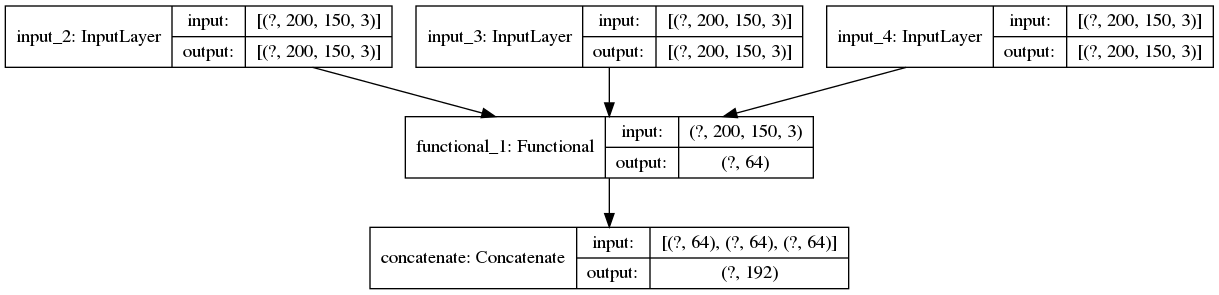

In [11]:
from tensorflow.keras.utils import plot_model
plot_model(net, show_shapes=1)

In [12]:
alpha = 0.2

def triplet_loss(y_true, y_pred):
    anchor, positive, negative = y_pred[:,:emb_size], y_pred[:,emb_size:2*emb_size], y_pred[:,2*emb_size:]
    positive_dist = tf.reduce_mean(tf.square(anchor - positive), axis=1)
    negative_dist = tf.reduce_mean(tf.square(anchor - negative), axis=1)
    return tf.maximum(positive_dist - negative_dist + alpha, 0.)

In [13]:
def data_generator(batch_size):
    while True:
        x = create_batch(batch_size,1)
        y = np.zeros((batch_size, 3*emb_size))
        yield x, y


In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint,TensorBoard

checkpoint_filepath = '/home/uas-dtu/FACE RECONITION/checkpoints/checkpoint_{epoch}.tf'
model_checkpoint_callback = [ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,),TensorBoard(log_dir="/home/uas-dtu/FACE RECONITION/logs")]

In [16]:
net.compile(optimizer = 'adam', loss = triplet_loss, metrics = ['accuracy'])

data_path = r'/home/uas-dtu/FACE RECONITION/weights'
save_path = os.path.join(data_path, "model_weights_triplet_loss_2048.h5")

In [ ]:
batch_size = 16
epochs = 50
steps_per_epoch = 50000

model_history = net.fit(
    data_generator(batch_size),
    epochs=epochs,verbose=1,steps_per_epoch=steps_per_epoch,callbacks=[model_checkpoint_callback])

Epoch 1/50
    1/50000 [..............................] - ETA: 27s - loss: 0.0344 - accuracy: 0.5625WARNING:tensorflow:From /home/uas-dtu/anaconda3/envs/tf/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
13986/50000 [=======>......................] - ETA: 1:59:06 - loss: 0.0627 - accuracy: 0.4513

In [ ]:
net.save_weights(save_path)

In [ ]:
# from google.colab.patches import cv2_imshow
test_sample = 1000
nway_min = 5
nway_max = 25
train_acc = []
nway_list = []
for nway in range(nway_min, nway_max+1,5):
    print("Checking %d way accuracy...." % nway)
    correct_count = 0
    for _ in range(test_sample):
        # Retrieving nway number of triplets and calculating embedding vector
        nway_anchor, nway_positive, _ = create_batch(nway,2)
        nway_anchor_embedding = embmodel.predict(nway_anchor)
        #print(nway_anchor_embedding)
        sample_index = random.randint(0,nway-1)
        sample_embedding = embmodel.predict(np.expand_dims(nway_positive[sample_index], axis=0))
        # print(sample_index, nway_anchor_embedding.shape, sample_embedding.shape)
        distance = tf.sqrt(tf.reduce_sum(tf.pow(nway_anchor_embedding - sample_embedding, 2), 1, keepdims=True)).numpy()
        if np.argmin(distance) == sample_index:
            correct_count+=1
    nway_list.append(nway)
    acc = (correct_count/test_sample)*100.
    train_acc.append(acc)
    print("Accuracy %.2f" % acc)


In [ ]:
# import os
# import shutil

# img_path = r'/content/drive/MyDrive/lfw_cut'

# count = 0

# for folder in os.listdir(img_path):
#     #print("Loading",folder,"...")
#     im_path = img_path +'/'+ folder
#     if len(os.listdir(im_path))==1:
#         count = count+ len(os.listdir(im_path))
#         print(im_path)
#         #shutil.rmtree(im_path)
# print(count)


In [ ]:
# for folder in os.listdir(img_path):
#     count = count + 1
#     #print("Loading",folder,"...",count)
#     im_path = img_path +'/'+ folder
#     for imgs in os.listdir(im_path):
#         if imgs[-3:] != "jpg":
#           print(imgs)

In [14]:
net.load_weights("/home/uas-dtu/FACE RECONITION/old_checkpoint/checkpoint_2.tf")